In [12]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_280m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_280m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='any_crime_280m'

In [13]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [14]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                        Any Crime Incidents Within 280m, Dec. 2022   
                                                 \emph{Independent Variable}                                                         
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_280m                                      0.000000e+00   
                                                 pre_treatment_change_in_any_crime_280m                               1.461786e-04   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                   1.048861e-01   
                                                 job_density_2013                                                     1.966027e-96   
                                                 med_hhinc2016                                                        2.669969e-03   
                                                 poor_share2010                                                       4.869917e-29   
                                                 popdensity2010                                                       5.083625e-27   
                                                 rent_twobed2015                                                      1.732917e-25   
                                                 share_white2010                                                      4.632726e-05   
                                                 traveltime15_2010                                                    6.475224e-47   
Panel C: Case Initiation                         for_cause                                                            7.220502e-01   
                                                 no_cause                                                             3.173347e-03   
                                                 non_payment                                                          1.747739e-01   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                             9.231497e-01   
                                                 hasAttyP                                                             8.314212e-02   
                                                 isEntityD                                                            3.888133e-01   
                                                 isEntityP                                                            3.744687e-07   

                                                                                                           
                                                                                        Plaintiff Victory  
                                                 \emph{Independent Variable}                               
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_280m             5.723894e-01  
                                                 pre_treatment_change_in_any_crime_280m      1.205085e-02  
Panel B: Census Tract Characteristics            frac_coll_plus2010                          2.403331e-01  
                                                 job_density_2013                            1.626836e-01  
                                                 med_hhinc2016                               1.910501e-01  
                                                 poor_share2010                              1.428679e-01  
                                                 popdensity2010                              5.946111e-02  
                                                 rent_twobed2015                             5.003043e-01  
                                                 share_white2010                             9.829904e-02  
                                                 traveltime15_2010                           2.271578e-01  
Panel C: Case Initiation   

In [15]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                Cases Won by Plaintiff   
Panel A twenty_seventeen_any_crime_280m                      33.561385   
        pre_treatment_change_in_any_crime_280m                0.536726   
Panel B Jobs per square mile (2010)                       16069.137185   
        Median household income (2016)                    48035.651626   
        Share below poverty line                              0.273292   
        Population density (2010)                         23086.043553   
        Median two bedroom rent (2015)                     1339.985876   
        Share white (2010)                                    0.312272   
        Share with commute $<$15 minutes (2010)               0.162315   
Panel C No cause                                              0.047744   
Panel D Plaintiff is an entity                                0.808499   

                                                Difference in Cases Won by Defendant  \
                                                                          Unweighted   
Panel A twenty_seventeen_any_crime_280m                                     0.757987   
        pre_treatment_change_in_any_crime_280m                              1.548862   
Panel B Jobs per square mile (2010)                                      3197.929971   
        Median household income (2016)                                   1777.651626   
        Share below poverty line                                            0.011240   
        Population density (2010)                                        1373.148087   
        Median two bedroom rent (2015)                                    -29.551242   
        Share white (2010)                                                  0.024618   
        Share with commute $<$15 minutes (2010)                             0.005986   
Panel C No cause                                                           -0.051771   
Panel D Plaintiff is an entity                                              0.099762   

                                                                         \
                                                 \emph{p}      Weighted   
Panel A twenty_seventeen_any_crime_280m          0.572389      0.723848   
        pre_treatment_change_in_any_crime_280m   0.012051      0.334349   
Panel B Jobs per square mile (2010)              0.162684  12430.784942   
        Median household income (2016)           0.191050   3350.719852   
        Share below poverty line                 0.142868      0.002541   
        Population density (2010)                0.059461    516.071504   
        Median two bedroom rent (2015)           0.500304    175.331237   
        Share white (2010)                       0.098299      0.088276   
        Share with commute $<$15 minutes (2010)  0.227158      0.022943   
Panel C No cause                                 0.000038     -0.113090   
Panel D Plaintiff is an entity                   0.000006      0.231828   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_any_crime_280m          7.723997e-01  
        pre_treatment_change_in_any_crime_280m   7.761631e-01  
Panel B Jobs per square mile (2010)              4.149765e-03  
        Median household income (2016)           1.929071e-01  
        Share below poverty line                 8.582678e-01  
        Population density (2010)                7.142088e-01  
        Median two bedroom rent (2015)           2.929502e-02  
        Share white (2010)                       1.548379e-03  
        Share with commute $<$15 minutes (2010)  1.745917e-02  
Panel C No cause                                 8.131455e-07  
Panel D Plaintiff is an entity                   6.974476e-09

In [16]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [17]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:14<00:00, 149.09it/s]


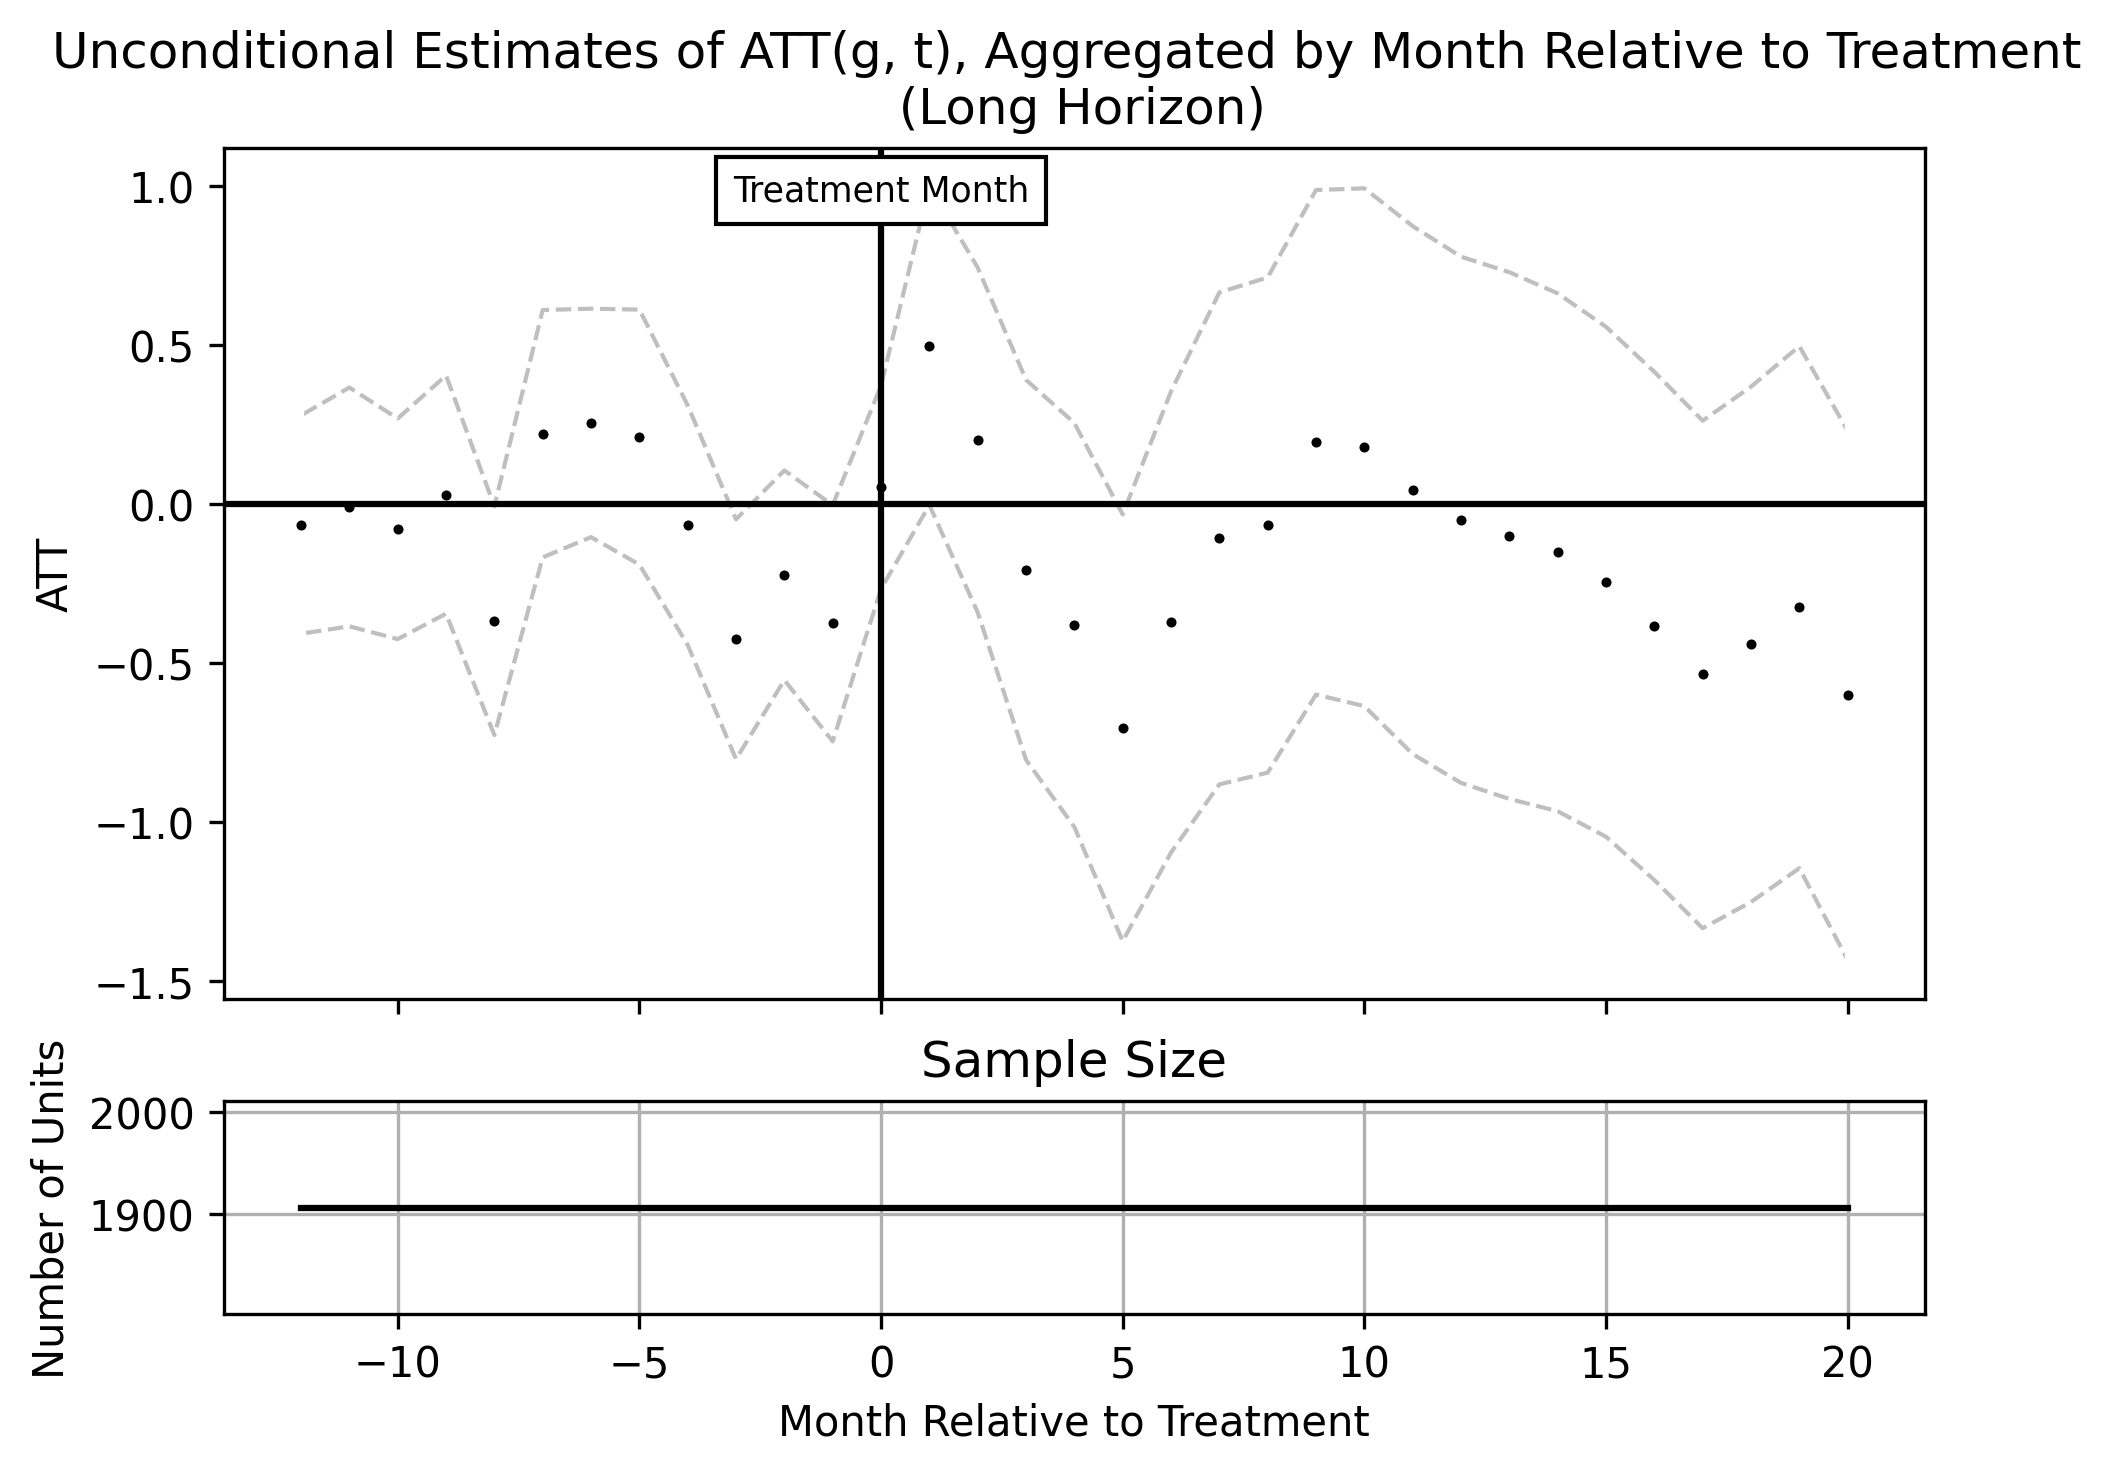

In [18]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

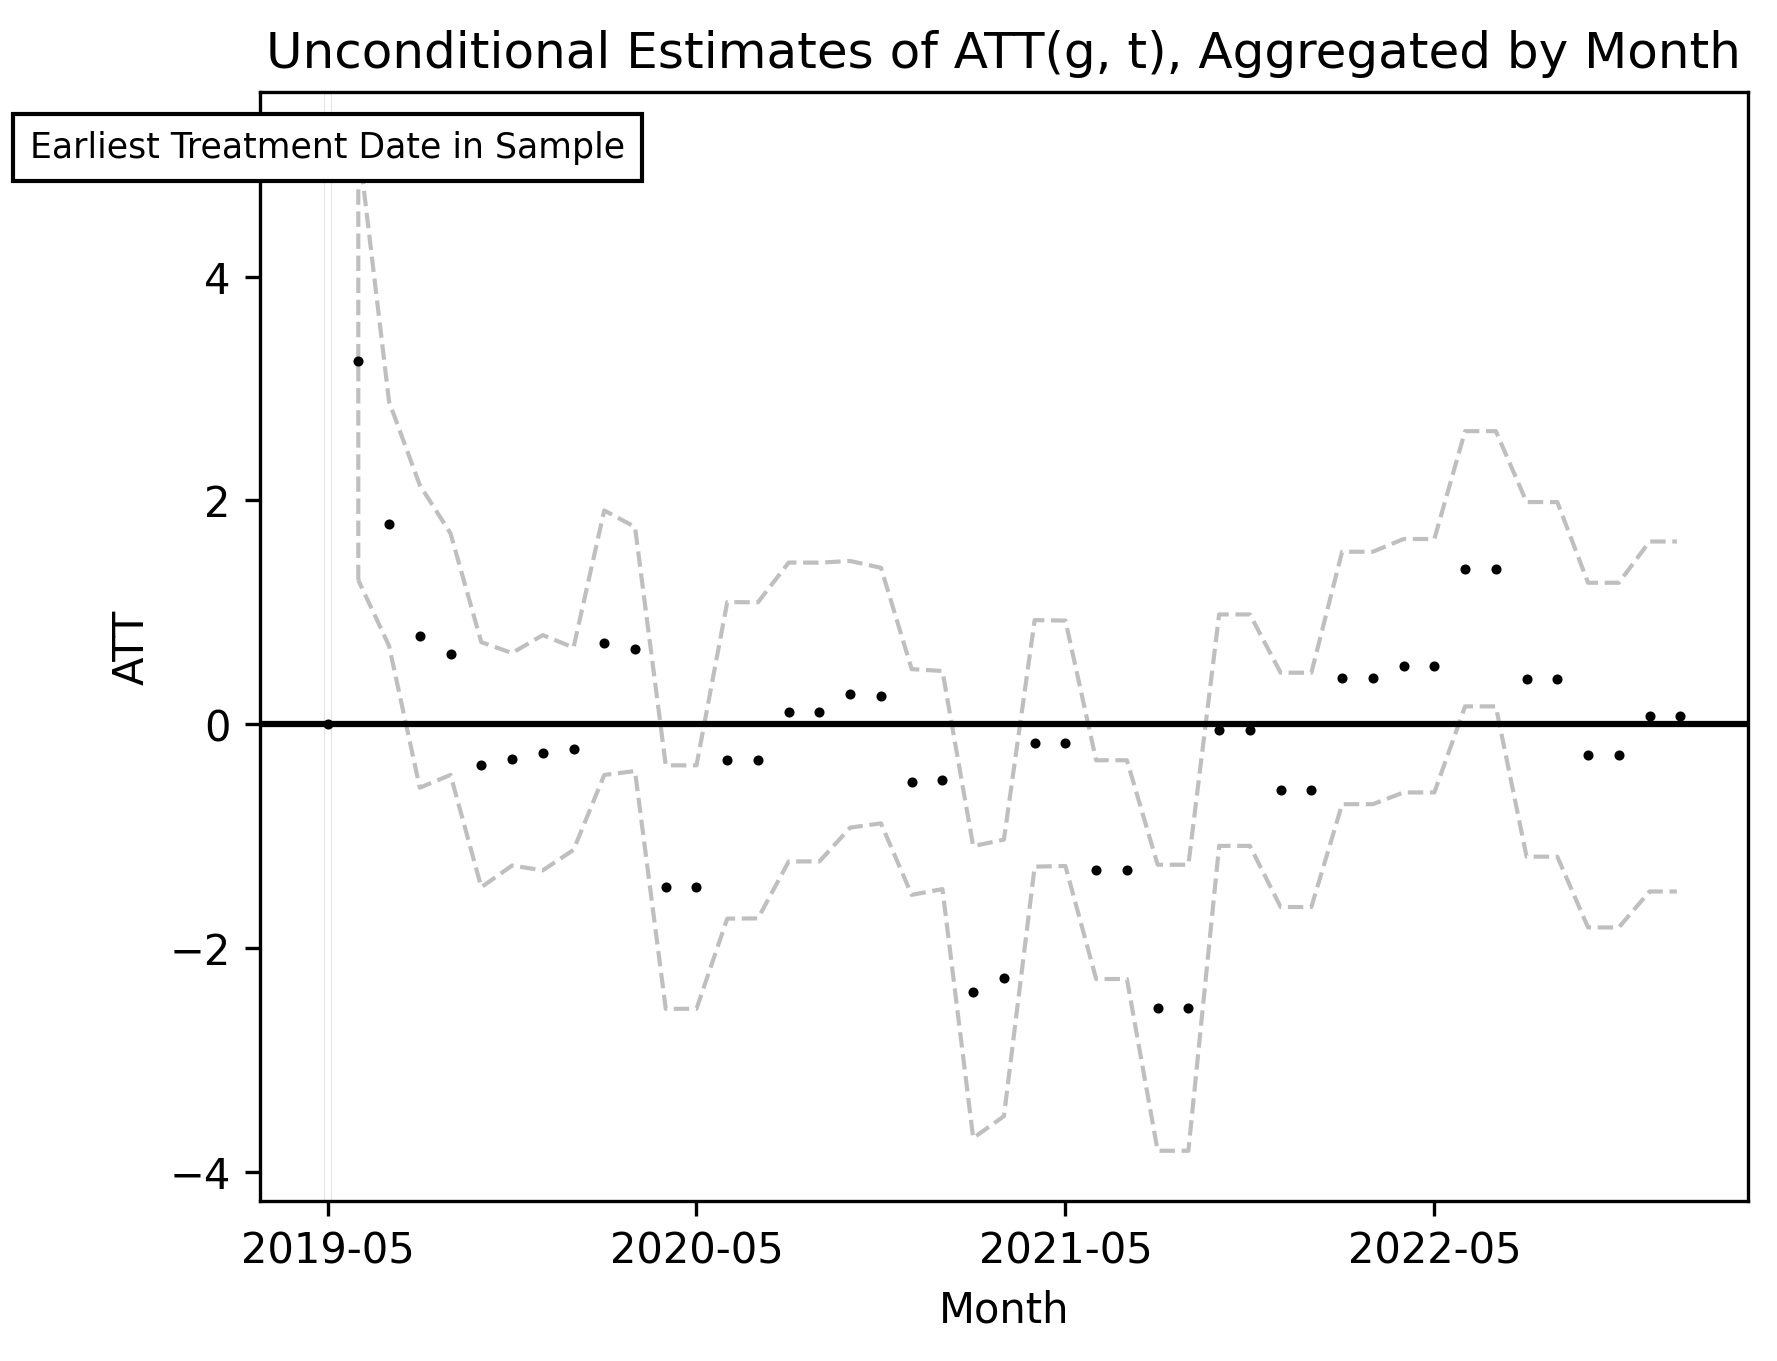

In [19]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [20]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   54%|██████████▊         | 1175/2184 [00:32<00:33, 29.86it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:33: RuntimeWarning: invalid value encountered in scalar divide
  eta_cont = np.mean(dr_att_cont) / np.mean(w_cont)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:33: Runt

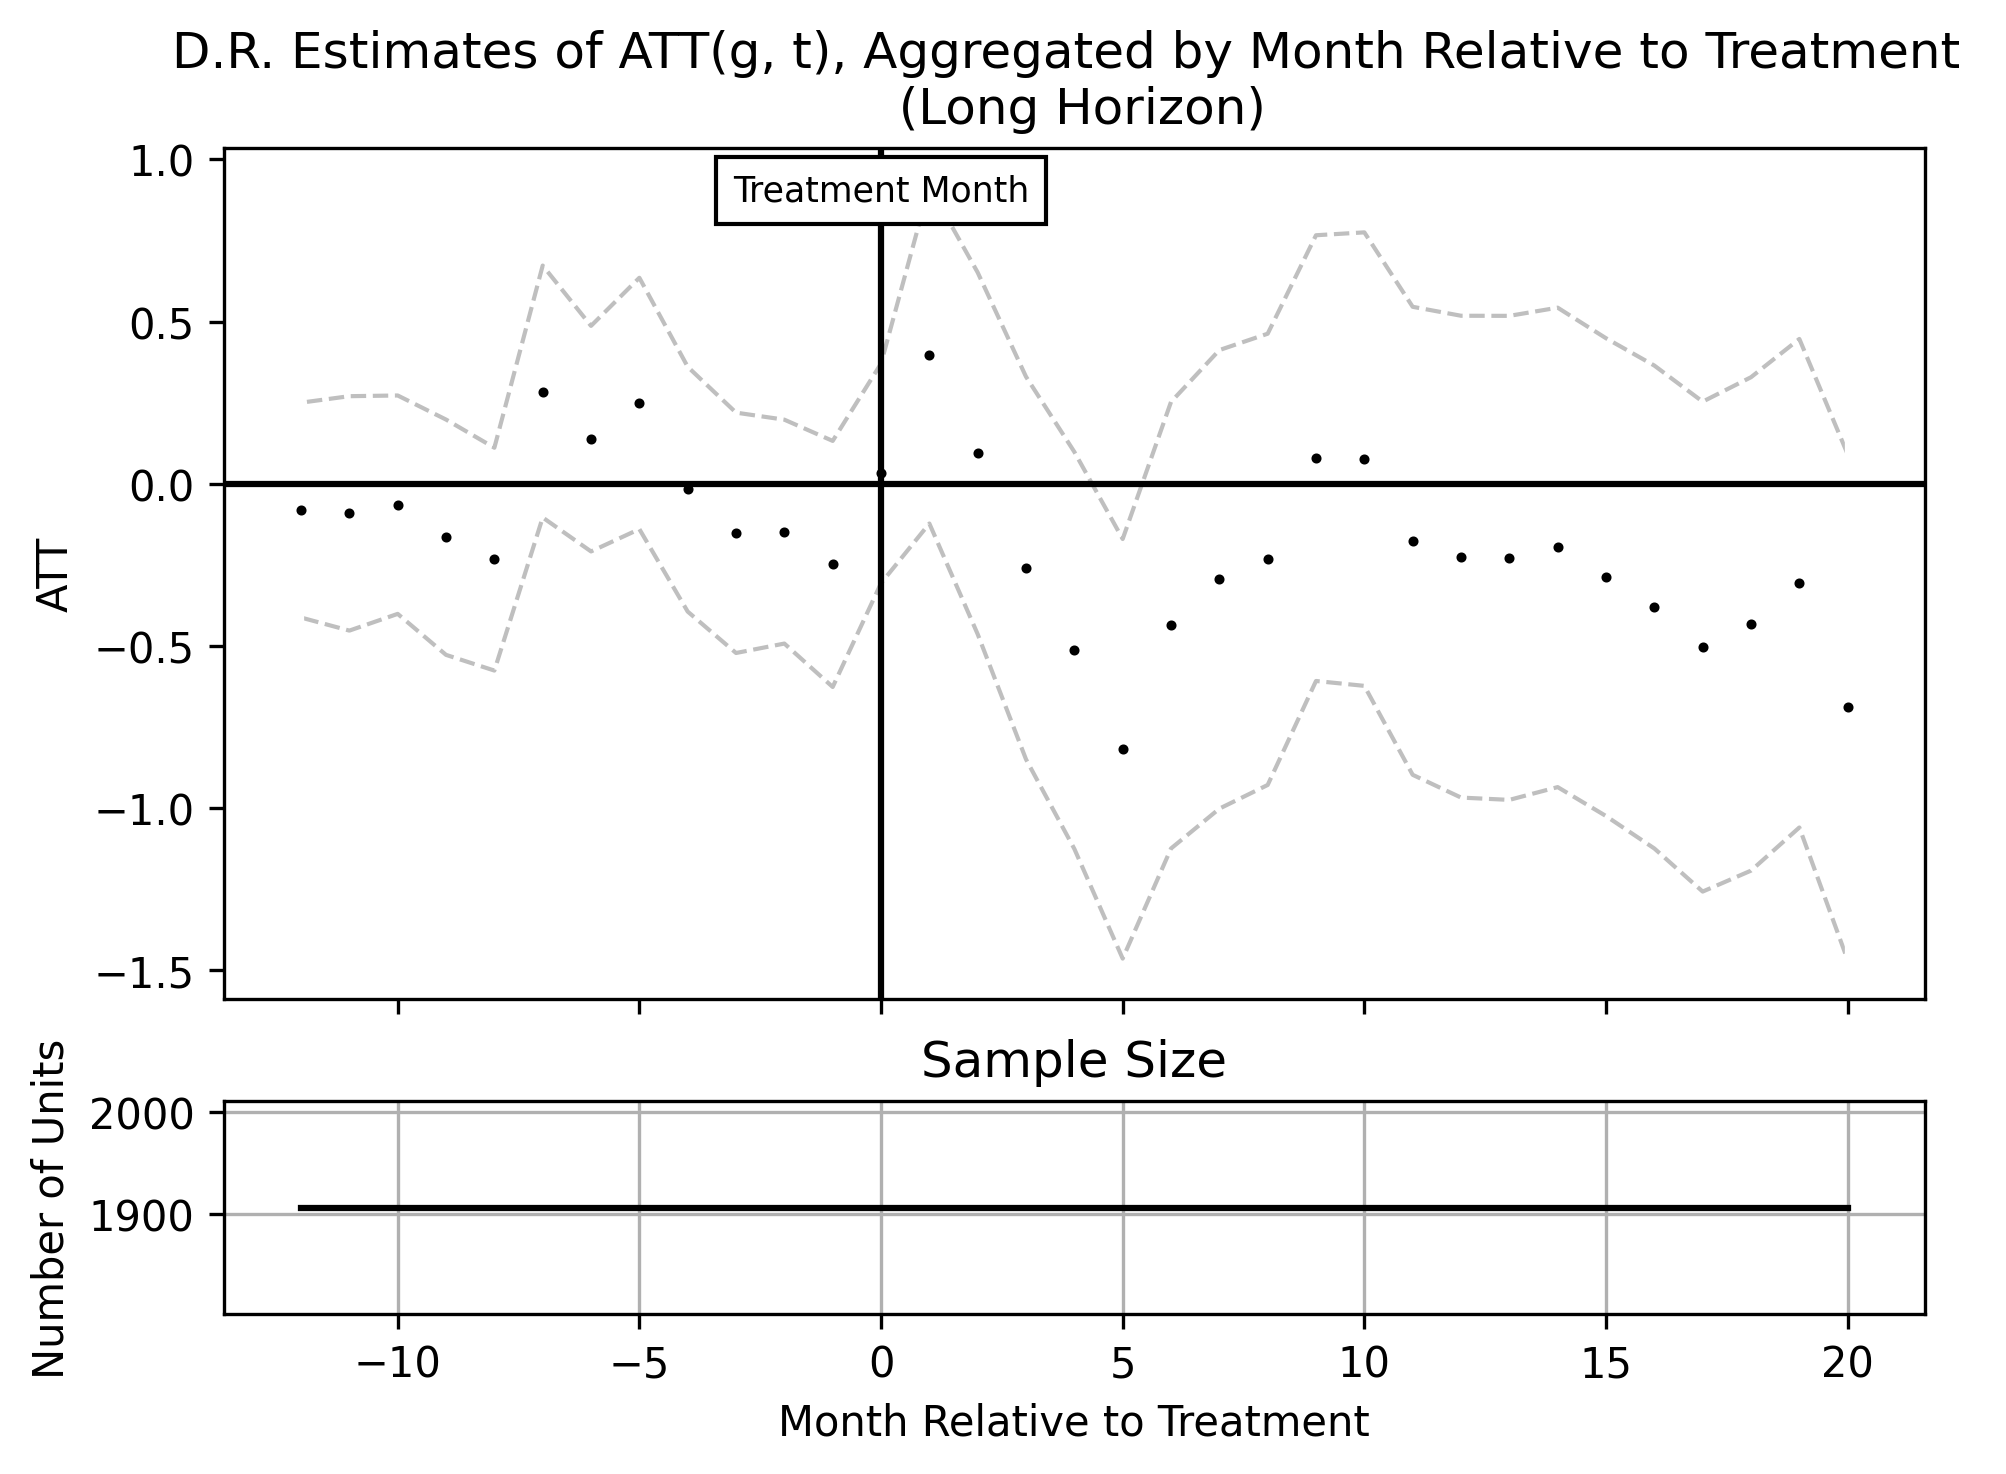

In [21]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

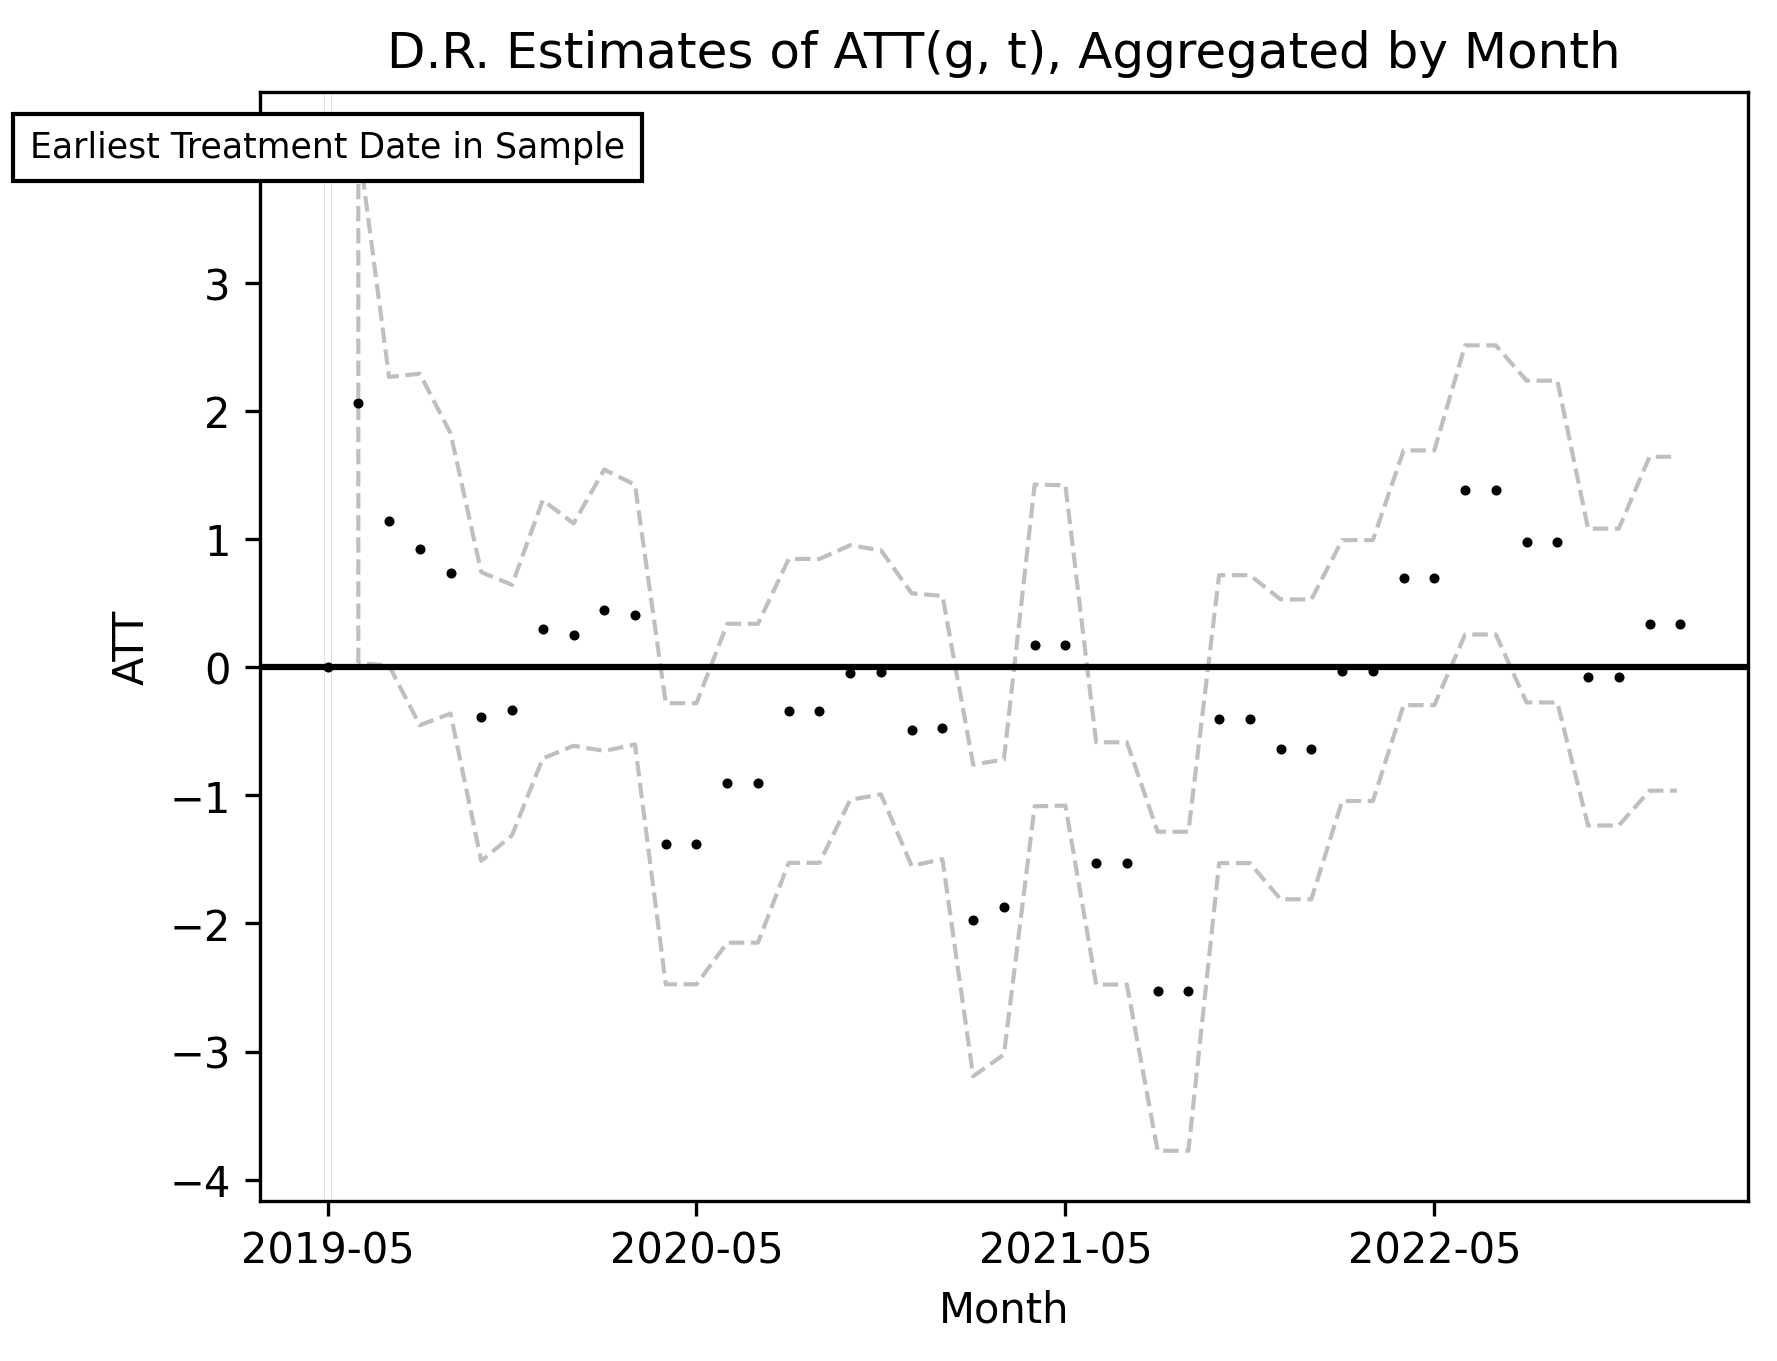

In [22]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")